In [1]:
import numpy as np
import os
import sys
import pandas as pd
import pyreadr
from plotnine import *
from mizani.formatters import percent_format

ModuleNotFoundError: No module named 'pyreadr'

In [ ]:
WHO = {"African":["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
    "Cameroon", "Cape Verde", "Central African Republic", 
    "Chad", "Comoros", "Ivory Coast", "Congo, the Democratic Republic of the", 
    "Equatorial Guinea", "Eritrea", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", 
    "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Madagascar", "Malawi", "Mali", "Mauritania", 
    "Mauritius", "Mozambique", "Namibia", "Niger", "Nigeria", "Republic of the Congo", "Rwanda", 
    "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", 
    "South Africa", "South Sudan", "Eswatini", "Togo", "Uganda", "Tanzania, United Republic of", "Zambia", "Zimbabwe"],
"Americas":["Antigua and Barbuda", "Argentina", "Bahamas", "Barbados", "Belize", 
            "Bolivia", "Brazil", "Canada", "Chile", "Colombia", 
            "Costa Rica", "Cuba", "Dominica", "Dominican Republic", 
            "Ecuador", "El Salvador", "Grenada", "Guatemala", "Guyana", 
            "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", 
            "Paraguay", "Peru", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", 
            "Suriname", "Trinidad and Tobago", "United States", "Uruguay", "Venezuela"],
"South-East Asian":["Bangladesh","Bhutan","Korea, Republic of","India","Indonesia","Maldives",
                    "Myanmar", "Nepal", "Sri Lanka", "Thailand", "Timor-Leste"],
"European":["Albania","Andorra","Armenia","Austria","Azerbaijan","Belarus","Belgium","Bosnia and Herzegovina",
            "Bulgaria","Croatia","Cyprus","Czechia","Denmark",
            "Estonia","Finland","France","Georgia","Germany","Greece","Hungary",
            "Iceland","Ireland","Israel","Italy","Kazakhstan","Kyrgyzstan","Latvia","Lithuania",
            "Luxembourg","Malta","Moldova, Republic of","Monaco","Montenegro","Netherlands",
            "North Macedonia","Norway","Poland","Portugal","Romania","Russian Federation","San Marino",
            "Serbia","Slovakia","Slovenia","Spain","Sweden","Switzerland","Tajikistan","Turkey", "Liechtenstein",
            "Turkmenistan","Ukraine","United Kingdom","Uzbekistan", "Kosovo"],
"Eastern Mediterranean":["Afghanistan","Bahrain","Djibouti","Egypt","Iran, Islamic Republic of","Iraq","Jordan","Kuwait","Lebanon","Libya","Morocco","Oman","Pakistan","Palestine, State of","Qatar","Saudi Arabia","Somalia","Sudan","Syrian Arab Republic","Tunisia","United Arab Emirates","Yemen"],
"Western Pacific":["Australia","Brunei","Cambodia","China","Cook Islands","Fiji","Japan","Kiribati","Laos","Malaysia","Marshall Islands","Micronesia","Mongolia","Nauru","New Zealand","Niue","Palau","Papua New Guinea","Philippines","Samoa","Singapore","Solomon Islands","South Korea","Tonga","Tuvalu","Vanuatu","Viet Nam"]}   

In [2]:
sids = ['Anguilla' ,'American Samoa' ,'Jamaica' ,'Papua New Guinea' ,'British Virgin Islands' ,
        'Kiribati' ,'Saint Vincent and the Grenadines' ,'Vanuatu' ,'Bahamas' ,
        'Fiji' ,'Puerto Rico' ,'Timor-Leste' ,'Dominican Republic' ,'New Caledonia' ,
        'United States Virgin Islands' ,'Comoros' ,'Aruba' ,'Federated States of Micronesia' ,'Netherlands Antilles' ,
        'Solomon Islands' ,'Dominica' ,'Nauru' ,'Trinidad and Tobago' ,'Cape Verde' ,
        'Belize' ,'Guam' ,'Saint Lucia' ,'Tuvalu' ,'Guyana' ,
        'Northern Mariana Islands' ,'Seychelles' ,'Maldives' ,'Antigua and Barbuda' ,'Cook Islands' ,
        'Montserrat' ,'Samoa' ,'Cuba' ,'Marshall Islands' ,'Suriname' ,
        'Bahrain' ,'Barbados' ,'French Polynesia' ,'Saint Kitts and Nevis' ,'Tonga' ,
        'Grenada' ,'Niue' ,'Sao Tome and Principe' ,'Guinea-Bissau' ,'Haiti' ,'Palau' ,'Singapore' ,'Mauritius']
tier1_countries = ["USA", "CHN"]
tier1_countries_eea = ["Austria", "Belgium", "Bulgaria", "Croatia",  "Cyprus", 
  "Czechia","Denmark", "Estonia", "Finland", "France","Germany","Greece", 
  "Hungary", "Iceland","Ireland", "Italy","Latvia", "Liechtenstein", "Lithuania",
  "Luxembourg", "Malta", "Netherlands", "Norway", "Poland", "Portugal","Romania", 
  "Slovakia", "Slovenia","Spain", "Sweden", "Switzerland", "Turkey", "Albania",
  "Bosnia and Herzegovina", "Kosovo", "Montenegro", "North Macedonia", "Serbia", "United Kingdom"]
tier2_countries = ["POL","AUS", "ZAF", "BRA", "IND", "IDN", "DEU","FRA","GBR"] # 

In [3]:
hdi = pd.read_csv("2020_hdi.csv", header = None)
hdi.set_axis(["index", "Country", "score", "HDI"], axis=1, inplace=True)
hdi.replace({"Korea (Republic of)": "Korea, Republic of", "Russian Federation":"Russian Federation",
            'Bolivia (Plurinational State of)': "Bolivia", "Congo (Democratic Republic of the)": 'Congo, the Democratic Republic of the',
            "Tanzania (United Republic of)": "Tanzania, United Republic of",
            "Iran (Islamic Republic of)": "Iran, Islamic Republic of",
            "Moldova (Republic of)": "Moldova, Republic of", 
            "Venezuela (Bolivarian Republic of)": "Venezuela",
            "Côte d'Ivoire": "Cote d'Ivoire"}, inplace = True)

FileNotFoundError: [Errno 2] File b'2020_hdi.csv' does not exist: b'2020_hdi.csv'

In [5]:
# load data
folder =   "Multiglobal_result/" # "EU_result/"  # "English_result/" # 
df_health = pd.read_pickle(folder + 'df_kwic_health.pkl')
df_climate = pd.read_pickle(folder + 'df_kwic_climate.pkl')
df_intersection = pd.read_csv(folder + 'df_kwic_health_climate.csv')
df_gender = pd.read_csv(folder + 'gender.csv')
df_covid = pd.read_csv(folder + 'covid.csv')

In [6]:
path = "results/" + folder

#os.mkdir(path)

In [7]:
csr = pd.read_csv('Multiglobal_result/multiglobal_english_all.csv', chunksize = 10000)
if folder == "EU_result/":
    EU = pd.DataFrame()
    for df in csr:
        csr_mask = [True if i in tier1_countries_eea else False for i in df.Country]
        EU = EU.append(df[csr_mask])
    csr = EU
elif folder == "English_result/":
    EN = pd.DataFrame()
    for df in csr:
        EN = EN.append(df[df.English >0])
    csr = EN
else:
    glob = pd.DataFrame()
    for df in csr:
        glob = glob.append(df)
    csr = glob

In [8]:
dd = csr[['Participant', 'Sector', 'Country', 'Year', 'Id', 'code', ]]

In [9]:
csr = dd.merge(hdi[['Country', "HDI"]], on = "Country", how = "left")

In [10]:
def sids_merg(row):
    sids_sign = None
    if row["Country"] in sids:
        sids_sign = "SIDS"
    elif (row["Country"] in tier1_countries_eea) or (row["code"] in tier1_countries):
        sids_sign = "Tier 1"
    elif row["code"] in tier2_countries:
        sids_sign = "Tier 2"
    return sids_sign
csr["SIDS"] = csr.apply(lambda x: sids_merg(x), axis = 1)

In [11]:
csr[csr["SIDS"].isna()].Country.unique()

array(['Korea, Republic of', 'Tunisia', 'Lebanon', 'Japan', 'Philippines',
       'Costa Rica', 'Myanmar', 'Kazakhstan', 'Canada', 'Kenya', 'Nepal',
       'Ukraine', 'Chile', 'United Arab Emirates', 'Argentina',
       'Malaysia', 'Mexico', 'Colombia', 'Nigeria', 'Kuwait',
       'New Zealand', 'Andorra', 'Egypt', 'Thailand', 'Bolivia', 'Qatar',
       'Sri Lanka', 'Bermuda', 'Viet Nam', 'Bangladesh', 'Saudi Arabia',
       'Russian Federation', 'Jordan', 'Panama', 'Guatemala', 'Uganda',
       'Pakistan', 'Peru', 'Angola', 'Ecuador', 'Sudan', 'Israel',
       'South Sudan', 'Syrian Arab Republic', 'Zimbabwe', 'Monaco',
       'Belarus', 'Georgia', 'Ghana', 'El Salvador', 'Mozambique',
       'Armenia', 'Paraguay', 'Oman', 'Azerbaijan',
       'Congo, the Democratic Republic of the',
       'Iran, Islamic Republic of', 'Namibia', 'Morocco',
       'Palestine, State of', 'Iraq', 'Yemen', 'Somalia', 'Nicaragua',
       'Tanzania, United Republic of', 'Moldova, Republic of', 'Togo',
    

In [12]:
def who_seatch(x):
    region = None
    for k, v in WHO.items():
        if x in v:
            region = k 
    if not region:
        print(x)
    return region
csr["WHO"] = csr.Country.apply(who_seatch)

Bermuda
Bermuda
Bermuda
Bermuda
Bermuda
Bermuda
Bermuda
Bermuda
Bermuda
Bermuda
Bermuda
Cote d'Ivoire
Bermuda
Bermuda
Bermuda
Bermuda
Cote d'Ivoire
Cote d'Ivoire
Cote d'Ivoire


In [13]:
def agg_func(df, key = "intersection"):
    agg_inter = pd.DataFrame(df.groupby("Id").count().key_word).reset_index()
    agg_inter["Id"] = agg_inter["Id"].astype("int")
    agg_inter.rename(columns = {"key_word": key}, inplace = True)
    return agg_inter

In [14]:
csr = csr[csr.Year > 2010]
reference = pd.merge(csr[["Participant",'Sector', 'Year', 'Id', "code", "Country", "WHO", "HDI", "SIDS"]], agg_func(df_intersection, "intersection"), on = "Id", how = "left")
reference = pd.merge(reference, agg_func(df_health, "health"), on = "Id", how = "left")
reference = pd.merge(reference, agg_func(df_climate, "climate"), on = "Id", how = "left")
reference = pd.merge(reference, agg_func(df_gender, "gender"), on = "Id", how = "left")
reference = pd.merge(reference, agg_func(df_covid, "covid"), on = "Id", how = "left")
reference = reference.fillna(0)
#reference["n_company_year"] = reference.groupby(["Year"]).Id.transform("nunique")
reference["total_texts"] = reference.groupby(["Year", "Sector"]).Id.transform("nunique")

In [15]:
reference["intersection_texts"] = reference.groupby(["Year", "Sector", "Participant"]).intersection.transform("sum") > 0
reference["climate_texts"] = reference.groupby(["Year", "Sector", "Participant"]).climate.transform("sum") > 0
reference["health_texts"] = reference.groupby(["Year", "Sector", "Participant"]).health.transform("sum") > 0

In [16]:
avg_sector = reference[reference.Year == 2021].groupby("Sector").agg({"intersection":"mean", "health":"mean", "climate":"mean",}).reset_index()
avg_sector = avg_sector.round(2).sort_values("Sector")

In [17]:
sum_1 = reference.agg({"Participant": ["count", "nunique",],}).T.reset_index(drop = True)
sum_2 = reference.agg({ "health_texts": ["sum"], "climate_texts": "sum", "intersection_texts": "sum", }).reset_index(drop = True)

In [18]:
summary = pd.concat([sum_1, sum_2, pd.DataFrame(sum_2.squeeze()/sum_1["count"].values).T], axis=1, )
summary = summary.round({"health_texts":2,"climate_texts": 2, "intersection_texts": 3})
summary.set_axis(["Companies (N)", "Companies (Unique)", "Health, (N)", "Climate, (N)", "Intersection, (N)", 
                  "Health, %", "Climate, %", "Intersection, %"], axis=1, inplace=True)

In [19]:
# 0_0_data_summary
summary.to_csv(path + '0_0_data_summary.csv', index = False)
summary

,Companies (N),Companies (Unique),"Health, (N)","Climate, (N)","Intersection, (N)","Health, %","Climate, %","Intersection, %"
0,39159,11029,32851,24180,8276,0.84,0.62,0.211


In [20]:
sum_1 = reference.groupby(["Year"]).agg({"Participant": "count",}).reset_index()
sum_1.set_axis(["Year", "Companies (N)"], axis=1, inplace=True)
sum_2 = reference.groupby(["Year"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", }).reset_index(drop = True)
sum_2.set_axis(["Climate (N)", "Health (N)", "Intersection (N)"], axis=1, inplace=True)
sum_3 = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Companies (N)"]).round(2))
sum_3.set_axis(["Climate (Prop)", "Health (Prop)", "Intersection (Prop)"], axis=1, inplace=True)
yearly_breakdown = pd.concat([sum_1, sum_2, sum_3], axis=1, )
yearly_breakdown.to_csv(path + '0_1_yearly_breakdown.csv', index = False)
yearly_breakdown

,Year,Companies (N),Climate (N),Health (N),Intersection (N),Climate (Prop),Health (Prop),Intersection (Prop)
0,2011,2036,1306,1697,391,0.64,0.83,0.19
1,2012,2991,1741,2414,449,0.58,0.81,0.15
2,2013,3207,1834,2601,474,0.57,0.81,0.15
3,2014,3162,1799,2578,471,0.57,0.82,0.15
4,2015,3454,1986,2836,539,0.57,0.82,0.16
5,2016,3554,2012,2918,566,0.57,0.82,0.16
6,2017,3711,2164,3074,648,0.58,0.83,0.17
7,2018,3741,2219,3111,716,0.59,0.83,0.19
8,2019,4041,2524,3438,838,0.62,0.85,0.21
9,2020,3542,2487,3098,1038,0.70,0.87,0.29


In [21]:
reference_health = reference[reference.Sector == "Health Care Equipment & Ser..."]
sum_1 = reference_health.groupby(["Year"]).agg({"Participant": "count",}).reset_index()
sum_1.set_axis(["Year", "Companies (N)"], axis=1, inplace=True)
sum_2 = reference_health.groupby(["Year"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", }).reset_index(drop = True)
sum_2.set_axis(["Climate (N)", "Health (N)", "Intersection (N)"], axis=1, inplace=True)
sum_3 = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Companies (N)"]).round(2))
sum_3.set_axis(["Climate (Prop)", "Health (Prop)", "Intersection (Prop)"], axis=1, inplace=True)
yearly_breakdown_health = pd.concat([sum_1, sum_2, sum_3], axis=1, )

In [22]:
# not company check but document check
sum_1 = reference.groupby(["Year", "WHO"]).agg({"Participant": "count",}).reset_index()
sum_1.set_axis(["Year", "WHO", "Total documents"], axis=1, inplace=True)
sum_2 = reference.groupby(["Year", "WHO"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1, inplace=True)
who_prop = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
who_prop = who_prop[who_prop.WHO != 0].sort_values(["WHO", "Year"])

In [23]:
sum_1 = reference_health.groupby(["Year", "WHO"]).agg({"Participant": "count",}).reset_index()
sum_1.set_axis(["Year", "WHO", "Total documents"], axis=1, inplace=True)
sum_2 = reference_health.groupby(["Year", "WHO"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1, inplace=True)
who_prop_health = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
who_prop_health = who_prop_health[who_prop_health.WHO != 0].sort_values(["WHO", "Year"])

In [24]:
# not company check but document check
sum_1 = reference.groupby(["Year", "SIDS"]).agg({"Participant": "count",}).reset_index()
sum_1.set_axis(["Year", "SIDS", "Total documents"], axis=1, inplace=True)
sum_2 = reference.groupby(["Year", "SIDS"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1, inplace=True)
sids_prop = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
sids_prop = sids_prop[sids_prop.SIDS != 0].sort_values(["SIDS", "Year"])

In [25]:
# not company check but document check
sum_1 = reference_health.groupby(["Year", "SIDS"]).agg({"Participant": "count",}).reset_index()
sum_1.set_axis(["Year", "SIDS", "Total documents"], axis=1, inplace=True)
sum_2 = reference_health.groupby(["Year", "SIDS"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1, inplace=True)
sids_prop_health = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
sids_prop_health = sids_prop_health[sids_prop_health.SIDS != 0].sort_values(["SIDS", "Year"])

In [26]:
# not company check but document check
sum_1 = reference.groupby(["Year", "HDI"]).agg({"Participant": "count",}).reset_index()
sum_1.set_axis(["Year", "HDI", "Total documents"], axis=1, inplace=True)
sum_2 = reference.groupby(["Year", "HDI"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1, inplace=True)
hdi_prop = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
hdi_prop = hdi_prop[hdi_prop.HDI != 0].sort_values(["HDI", "Year"])

In [27]:
sum_1 = reference_health.groupby(["Year", "HDI"]).agg({"Participant": "count",}).reset_index()
sum_1.set_axis(["Year", "HDI", "Total documents"], axis=1, inplace=True)
sum_2 = reference_health.groupby(["Year", "HDI"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1, inplace=True)
hdi_prop_health = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
hdi_prop_health = hdi_prop_health[hdi_prop_health.HDI != 0].sort_values(["HDI", "Year"])

In [28]:
sum_1 = reference.groupby(["Sector"]).agg({"Participant": "count",}).reset_index()
sum_1.set_axis(["Sector", "Total documents"], axis=1, inplace=True)
sum_2 = reference.groupby(["Sector"]).agg({ "climate_texts": "sum","health_texts": ["sum"], "intersection_texts": "sum", })
sum_2.set_axis(["Climate", "Health", "Intersection"], axis=1, inplace=True)
sector_prop = pd.DataFrame(sum_2.apply(lambda x: x/sum_1["Total documents"].values).round(2)).reset_index()
sector_prop = sector_prop.sort_values(["Sector"])

In [29]:
reference_df_sector = reference.groupby(["Sector"]).agg({"intersection": "sum",
                                           "climate": "sum",
                                           "health":"sum", }).reset_index()
reference_who = reference.groupby(["WHO", "Year"]).agg({"intersection": "sum",
                                           "climate": "sum",
                                           "health":"sum", })
reference_who["sum"] = reference_who["intersection"] + reference_who["climate"] + reference_who["health"]
reference_who.reset_index(inplace = True)
reference_hdi = reference.groupby(["HDI", "Year"]).agg({"intersection": "sum",
                                           "climate": "sum",
                                           "health":"sum", }).reset_index()
reference_hdi.HDI = pd.Categorical(reference_hdi.HDI, categories=['LOW HUMAN DEVELOPMENT',
       'MEDIUM HUMAN DEVELOPMENT','HIGH HUMAN DEVELOPMENT',  'VERY HIGH HUMAN DEVELOPMENT'], ordered=True)
reference_hdi.dropna(inplace = True)

reference_hdi_health = reference_health.groupby(["HDI", "Year"]).agg({"intersection": "sum",
                                           "climate": "sum",
                                           "health":"sum", }).reset_index()
reference_hdi_health.HDI = pd.Categorical(reference_hdi_health.HDI, categories=['LOW HUMAN DEVELOPMENT',
       'MEDIUM HUMAN DEVELOPMENT','HIGH HUMAN DEVELOPMENT',  'VERY HIGH HUMAN DEVELOPMENT'], ordered=True)
reference_hdi_health.dropna(inplace = True)

reference_sids = reference.groupby(["SIDS", "Year"]).agg({"intersection": "sum",
                                           "climate": "sum",
                                           "health":"sum", }).reset_index()
reference_sids.SIDS = pd.Categorical(reference_sids.SIDS, categories=['SIDS',
       'Tier 1','Tier 2',], ordered=True)
reference_sids.dropna(inplace = True)

reference_sids_health = reference_health.groupby(["SIDS", "Year"]).agg({"intersection": "sum",
                                           "climate": "sum",
                                           "health":"sum", }).reset_index()
reference_sids_health.SIDS = pd.Categorical(reference_sids_health.SIDS, categories=['SIDS',
       'Tier 1','Tier 2',], ordered=True)
reference_sids_health.dropna(inplace = True)

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1a_prop_of_companies.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1a_prop_of_companies.pdf


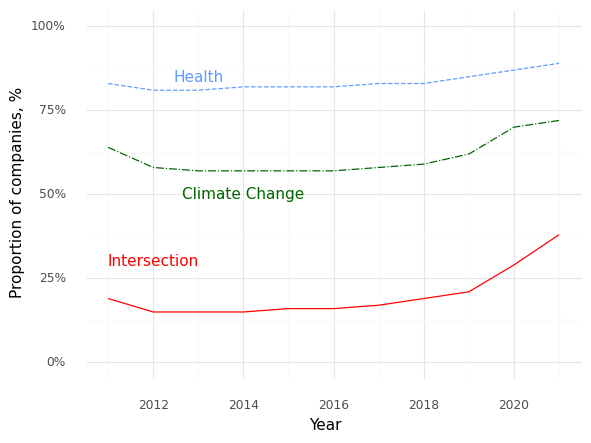

<ggplot: (8777531135054)>

In [30]:
yearly_breakdown[["Year","Climate (Prop)", "Health (Prop)", "Intersection (Prop)"]].to_csv(path+ "1a_prop_of_companies.csv")
plt = pd.melt(yearly_breakdown[["Year","Climate (Prop)", "Health (Prop)", "Intersection (Prop)"]], id_vars=['Year'] )
plt.variable = pd.Categorical(plt.variable, categories=["Intersection (Prop)", "Climate (Prop)", "Health (Prop)"], ordered=True)
a1 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
geom_path(aes(linetype = "variable")) + \
scale_linetype_manual(values = ("solid", 'dashdot', "--")) + \
annotate("text", x = 2013, y = 0.85,# 0.8,  
         label = "Health", color = "#619cff") + \
annotate("text", x = 2014, y = 0.5,#0.4,
         label = "Climate Change", color = "darkgreen") + \
annotate("text", x = 2012, y = 0.3, 
         label = "Intersection", color = "red") + \
scale_y_continuous(labels = percent_format(), limits = (0, 1)) + \
theme_minimal() + \
theme(legend_position = "none") + \
scale_colour_manual(values=("red", "darkgreen", "#619cff" )) +\
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Proportion of companies, %") 
a1.save(path +'1a_prop_of_companies.png')
a1.save(path +'1a_prop_of_companies.pdf')
a1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2p_prop_of_companies.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2p_prop_of_companies.pdf


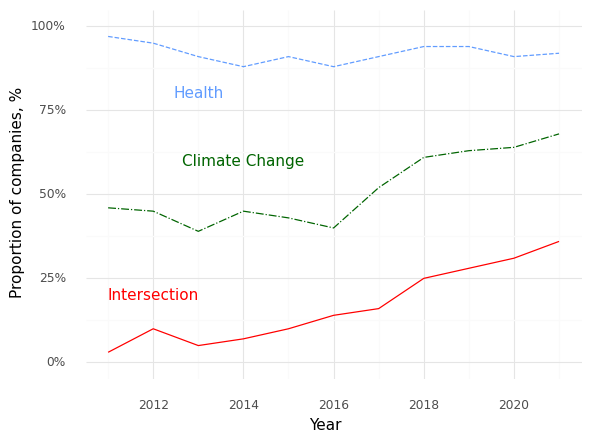

<ggplot: (-9223363259323718684)>

In [59]:
yearly_breakdown_health[["Year","Climate (Prop)", "Health (Prop)", "Intersection (Prop)"]].to_csv(path+ "2p_prop_of_companies.csv")
plt = pd.melt(yearly_breakdown_health[["Year","Climate (Prop)", "Health (Prop)", "Intersection (Prop)"]], id_vars=['Year'] )
plt.variable = pd.Categorical(plt.variable, categories=["Intersection (Prop)", "Climate (Prop)", "Health (Prop)"], ordered=True)
p2 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
geom_path(aes(linetype = "variable")) + \
scale_linetype_manual(values = ("solid", 'dashdot', "--")) + \
annotate("text", x = 2013, y = 0.8,# 0.8,  
         label = "Health", color = "#619cff") + \
annotate("text", x = 2014, y = 0.6,#0.4,
         label = "Climate Change", color = "darkgreen") + \
annotate("text", x = 2012, y = 0.2, 
         label = "Intersection", color = "red") + \
scale_y_continuous(labels = percent_format(), limits = (0, 1)) + \
theme_minimal() + \
theme(legend_position = "none") + \
scale_colour_manual(values=("red", "darkgreen", "#619cff" )) +\
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Proportion of companies, %") 
p2.save(path +'2p_prop_of_companies.png')
p2.save(path +'2p_prop_of_companies.pdf')
p2

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1b_number_of_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1b_number_of_references.pdf


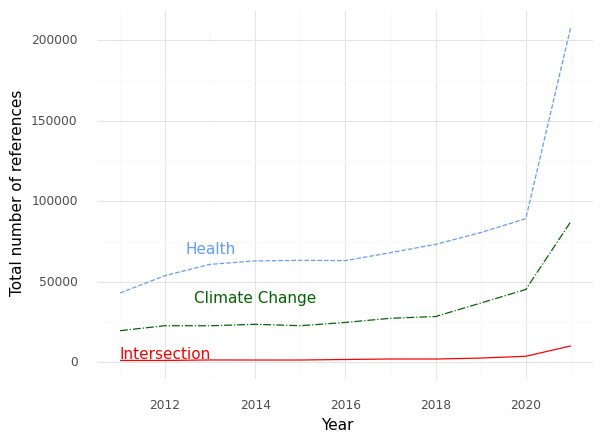

<ggplot: (-9223363259337443538)>

In [61]:
# breaks = (20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000)
b1csv = reference.groupby("Year").agg({"intersection":"sum", "health":"sum", "climate":"sum"}).reset_index()
b1csv.to_csv(path+ "1b_number_of_references.csv")
plt = pd.melt(b1csv, id_vars=['Year'] )
plt.variable = pd.Categorical(plt.variable, categories=["intersection", "climate", "health"], ordered=True)
b1 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
geom_path(aes(linetype = "variable")) + \
scale_linetype_manual(values = ("solid", 'dashdot', "--")) + \
annotate("text", x = 2013, y = 70000, label = "Health", color = "#619cff") + \
annotate("text", x = 2014, y = 40000, label = "Climate Change", color = "darkgreen") + \
annotate("text", x = 2012, y = 5000, label = "Intersection", color = "red") + \
scale_y_continuous(limits = (0, None), ) + \
theme_minimal() + \
theme(legend_position = "none") + \
scale_colour_manual(values=("red", "darkgreen", "#619cff" )) +\
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Total number of references") 
b1.save(path +'1b_number_of_references.png')
b1.save(path +'1b_number_of_references.pdf')
b1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2q_number_of_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2q_number_of_references.pdf


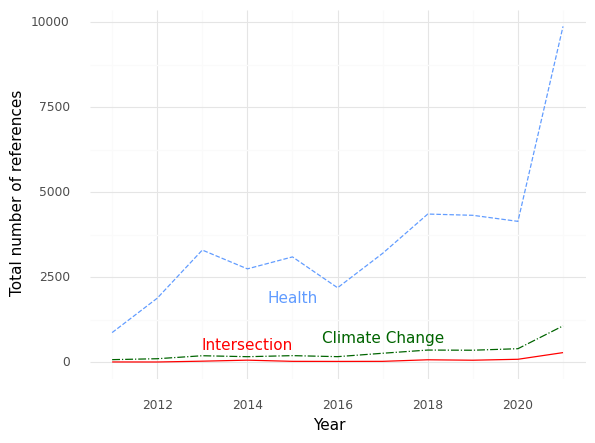

<ggplot: (-9223363259323746181)>

In [62]:
q2csv = reference_health.groupby("Year").agg({"intersection":"sum", "health":"sum", "climate":"sum"}).reset_index()
q2csv.to_csv(path+ "2q_number_of_references.csv")
plt = pd.melt(q2csv, id_vars=['Year'] )
plt.variable = pd.Categorical(plt.variable, categories=["intersection", "climate", "health"], ordered=True)
q2 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
geom_path(aes(linetype = "variable")) + \
scale_linetype_manual(values = ("solid", 'dashdot', "--")) + \
annotate("text", x = 2015, y = 1900, label = "Health", color = "#619cff") + \
annotate("text", x = 2017, y = 700, label = "Climate Change", color = "darkgreen") + \
annotate("text", x = 2014, y = 500, label = "Intersection", color = "red") + \
scale_y_continuous(limits = (0, None), ) + \
theme_minimal() + \
theme(legend_position = "none") + \
scale_colour_manual(values=("red", "darkgreen", "#619cff" )) +\
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Total number of references") 
# 1b_number_of_references
q2.save(path +'2q_number_of_references.png')
q2.save(path +'2q_number_of_references.pdf')
q2

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1c_number_of_references_intersection.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1c_number_of_references_intersection.pdf


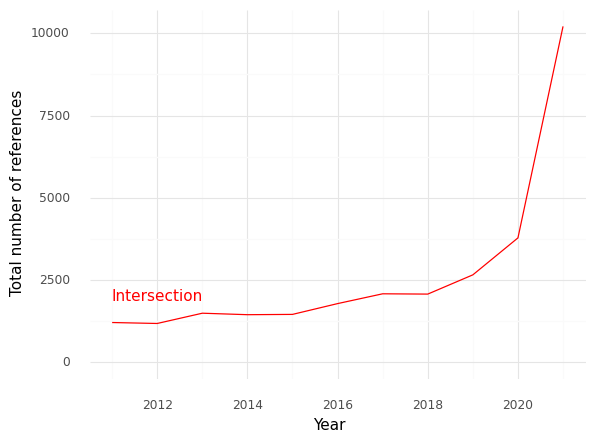

<ggplot: (8777530907603)>

In [34]:
c1csv = reference.groupby("Year").agg({"intersection":"sum"}).reset_index()
c1csv.to_csv(path+ "1c_number_of_references_intersection.csv")
plt = pd.melt(c1csv, id_vars=['Year'] )
c1 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
geom_path(aes(linetype = "variable")) + \
annotate("text", x = 2012, y = 2000, label = "Intersection", color = "red") + \
scale_y_continuous(limits = (0, None),) + \
theme_minimal() + \
theme(legend_position = "none") + \
scale_colour_manual(values=("red",)) +\
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Total number of references") 
c1.save(path +'1c_number_of_references_intersection.png')
c1.save(path +'1c_number_of_references_intersection.pdf')
c1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2r_number_of_references_intersection.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2r_number_of_references_intersection.pdf


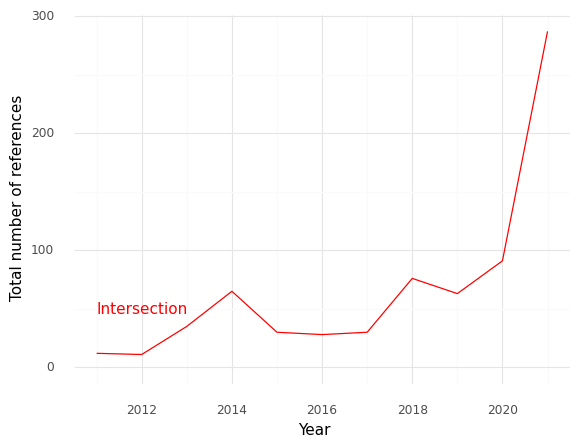

<ggplot: (-9223363259324438798)>

In [64]:
r2csv = reference_health.groupby("Year").agg({"intersection":"sum"}).reset_index()
r2csv.to_csv(path+ "2r_number_of_references_intersection.csv")
plt = pd.melt(r2csv, id_vars=['Year'] )
r2 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
geom_path(aes(linetype = "variable")) + \
annotate("text", x = 2012, y = 50, label = "Intersection", color = "red") + \
scale_y_continuous(limits = (0, None),) + \
theme_minimal() + \
theme(legend_position = "none") + \
scale_colour_manual(values=("red",)) +\
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Total number of references") 
r2.save(path +'2r_number_of_references_intersection.png')
r2.save(path +'2r_number_of_references_intersection.pdf')
r2

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1d_proportion_intersection.png
/.local/lib/python3.6/site-packages/plotnine/scales/scale_linetype.py:48: PlotnineWarning: Using linetype for an ordinal variable is not advised.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1d_proportion_intersection.pdf
/.local/lib/python3.6/site-packages/plotnine/scales/scale_linetype.py:48: PlotnineWarning: Using linetype for an ordinal variable is not advised.
/.local/lib/python3.6/site-packages/plotnine/scales/scale_linetype.py:48: PlotnineWarning: Using linetype for an ordinal variable is not advised.


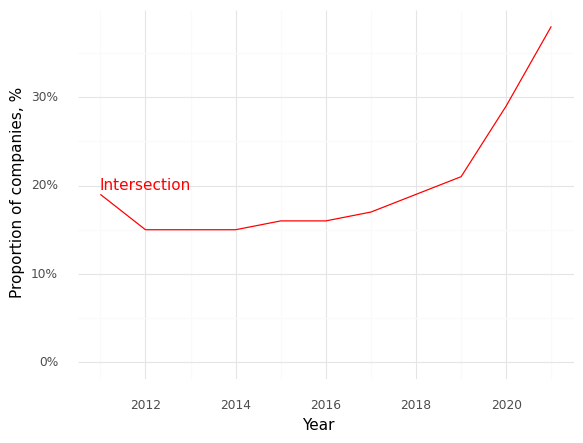

<ggplot: (-9223363259323641214)>

In [36]:
yearly_breakdown[["Year", "Intersection (Prop)"]].to_csv(path+ "1d_proportion_intersection.csv")
plt = pd.melt(yearly_breakdown[["Year", "Intersection (Prop)"]], id_vars=['Year'] )
plt.variable = pd.Categorical(plt.variable, categories=["Intersection (Prop)",], ordered=True)
d1 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
geom_path(aes(linetype = "variable")) + \
annotate("text", x = 2012, y = 0.2, label = "Intersection", color = "red") + \
scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
theme_minimal() + \
theme(legend_position = "none") + \
scale_colour_manual(values=("red",  )) +\
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Proportion of companies, %") 
d1.save(path +'1d_proportion_intersection.png')
d1.save(path +'1d_proportion_intersection.pdf')
d1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1e_avg_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1e_avg_references.pdf


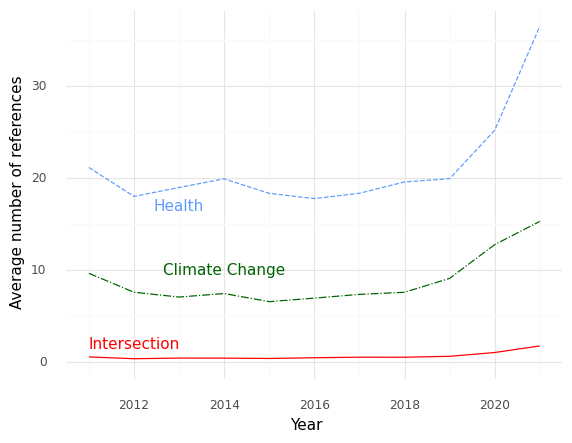

<ggplot: (-9223363259323775849)>

In [37]:
e1csv = reference.groupby("Year").agg({"intersection":"mean", "health":"mean", "climate":"mean"}).reset_index()
e1csv.to_csv(path+ "1e_avg_references.csv")
plt = pd.melt(e1csv, id_vars=['Year'] )
plt.variable = pd.Categorical(plt.variable, categories=["intersection", "climate", "health"], ordered=True)
e1 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
geom_path(aes(linetype = "variable")) + \
scale_linetype_manual(values = ("solid", 'dashdot', "--")) + \
annotate("text", x = 2013, y = 17, label = "Health", color = "#619cff") + \
annotate("text", x = 2014, y = 10, label = "Climate Change", color = "darkgreen") + \
annotate("text", x = 2012, y = 2, label = "Intersection", color = "red") + \
scale_y_continuous(limits = (0, None), ) + \
theme_minimal() + \
theme(legend_position = "none") + \
scale_colour_manual(values=("red", "darkgreen", "#619cff" )) +\
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Average number of references") 
e1.save(path +'1e_avg_references.png')
e1.save(path +'1e_avg_references.pdf')
e1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2s_avg_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2s_avg_references.pdf


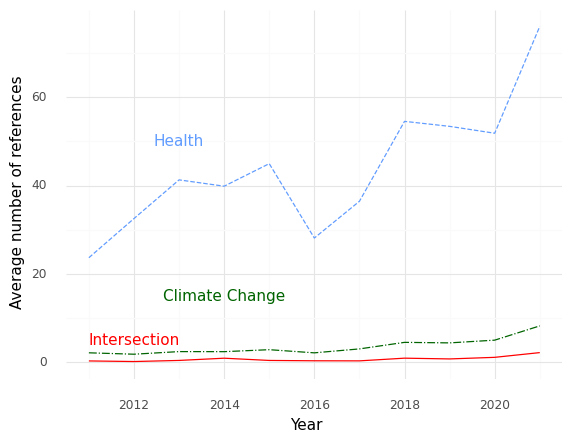

<ggplot: (8777530127999)>

In [65]:
e1csv = reference_health.groupby("Year").agg({"intersection":"mean", "health":"mean", "climate":"mean"}).reset_index()
e1csv.to_csv(path+ "2s_avg_references.csv")
plt = pd.melt(e1csv, id_vars=['Year'] )
plt.variable = pd.Categorical(plt.variable, categories=["intersection", "climate", "health"], ordered=True)
e1 = ggplot(plt, aes(x = "Year", y = "value", color = "variable")) + \
geom_path(aes(linetype = "variable")) + \
scale_linetype_manual(values = ("solid", 'dashdot', "--")) + \
annotate("text", x = 2013, y = 50, label = "Health", color = "#619cff") + \
annotate("text", x = 2014, y = 15, label = "Climate Change", color = "darkgreen") + \
annotate("text", x = 2012, y = 5, label = "Intersection", color = "red") + \
scale_y_continuous(limits = (0, None), ) + \
theme_minimal() + \
theme(legend_position = "none") + \
scale_colour_manual(values=("red", "darkgreen", "#619cff" )) +\
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Average number of references") 
e1.save(path +'2s_avg_references.png')
e1.save(path +'2s_avg_references.pdf')
e1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1f_who_number_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1f_who_number_references.pdf


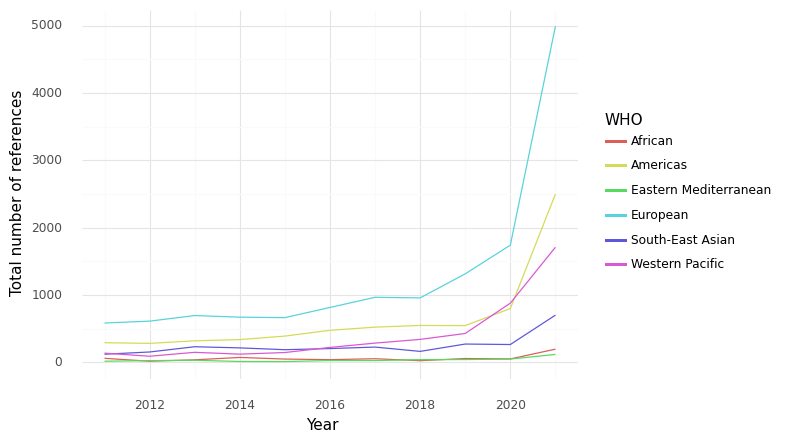

<ggplot: (8777531167857)>

In [39]:
reference_who[reference_who.WHO !=0].to_csv(path+ "1f_who_number_references.csv")
f1 = ggplot(reference_who[reference_who.WHO !=0], aes(x = "Year", y = "intersection", color = "WHO")) + \
geom_path(aes()) + \
scale_y_continuous(limits = (0, None), ) + \
theme_minimal() + \
theme(legend_position = "right") + \
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Total number of references") 
f1.save(path +'1f_who_number_references.png')
f1.save(path +'1f_who_number_references.pdf')
f1

In [40]:
reference_who_health = reference_health.groupby(["WHO", "Year"]).agg({"intersection": "sum",
                                           "climate": "sum",
                                           "health":"sum", })
reference_who_health["sum"] = reference_who_health["intersection"] + reference_who_health["climate"] + reference_who_health["health"]
reference_who_health.reset_index(inplace = True)

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2t_who_number_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2t_who_number_references.pdf


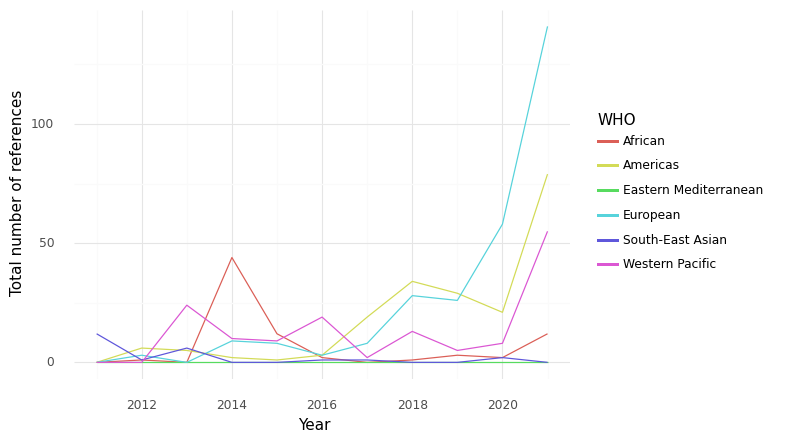

<ggplot: (-9223363259324570196)>

In [41]:
reference_who_health["Sector"] = "Health Care Equipment & Ser..."
reference_who_health[reference_who_health.WHO !=0].to_csv(path+ "2t_who_number_references.csv")
f1 = ggplot(reference_who_health[reference_who_health.WHO !=0], aes(x = "Year", y = "intersection", color = "WHO")) + \
geom_path(aes()) + \
scale_y_continuous(limits = (0, None), ) + \
theme_minimal() + \
theme(legend_position = "right") + \
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Total number of references") 
f1.save(path +'2t_who_number_references.png')
f1.save(path +'2t_who_number_references.pdf')
f1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1g_who_prop_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1g_who_prop_references.pdf


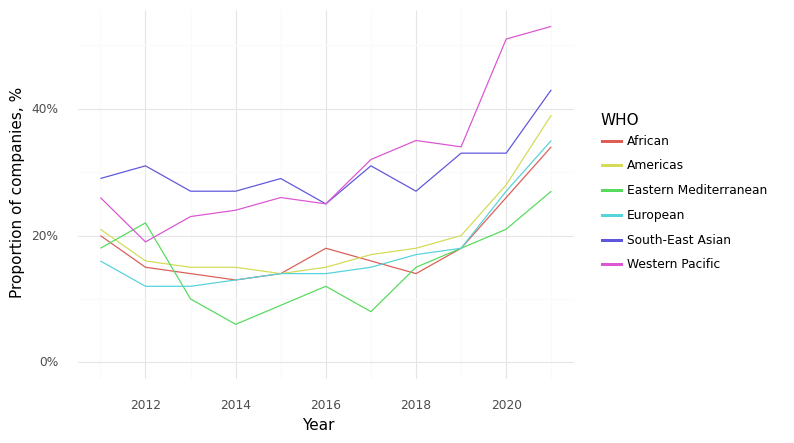

<ggplot: (-9223363259324377435)>

In [42]:
who_prop[who_prop.WHO !=0].to_csv(path+ "1g_who_prop_references.csv")
g1 = ggplot(who_prop[who_prop.WHO !=0], aes(x = "Year", y = "Intersection", color = "WHO")) + \
geom_path(aes()) + \
scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
theme_minimal() + \
theme(legend_position = "right") + \
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Proportion of companies, %") 
g1.save(path +'1g_who_prop_references.png')
g1.save(path +'1g_who_prop_references.pdf')
g1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2u_who_prop_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2u_who_prop_references.pdf


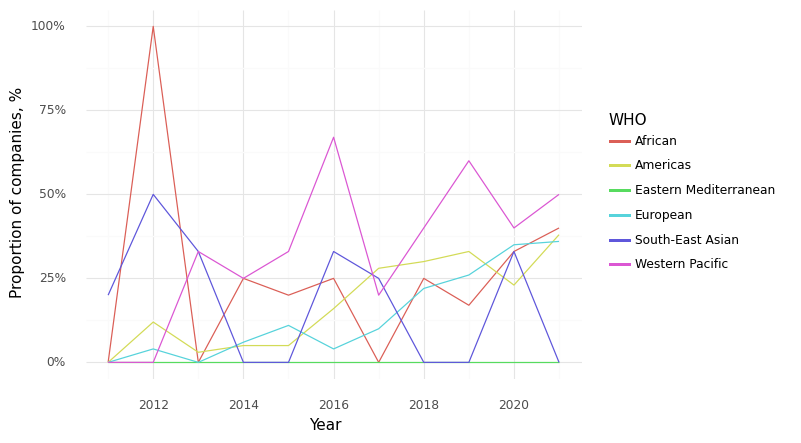

<ggplot: (-9223363259324029994)>

In [43]:
who_prop_health[who_prop_health.WHO !=0].to_csv(path+ "2u_who_prop_references.csv")
g1 = ggplot(who_prop_health[who_prop_health.WHO !=0], aes(x = "Year", y = "Intersection", color = "WHO")) + \
geom_path(aes()) + \
scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
theme_minimal() + \
theme(legend_position = "right") + \
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Proportion of companies, %") 
g1.save(path +'2u_who_prop_references.png')
g1.save(path +'2u_who_prop_references.pdf')
g1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1h_sids_number_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1h_sids_number_references.pdf


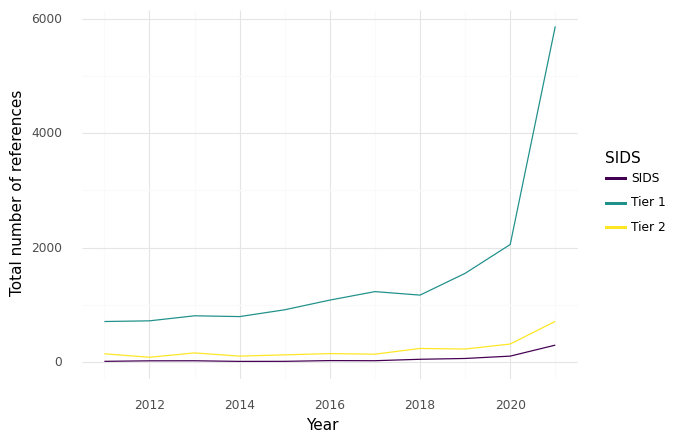

<ggplot: (8777531094483)>

In [44]:
#1h_sids_number_references.csv
reference_sids["sum"] = reference_sids["intersection"] + reference_sids["climate"] + reference_sids["health"] 
reference_sids.to_csv(path+ "1h_sids_number_references.csv")
h1 = ggplot(reference_sids[reference_sids.SIDS != 0], aes(x = "Year", y = "intersection", color = "SIDS")) + \
geom_path(aes()) + \
scale_y_continuous(limits = (0, None), ) + \
theme_minimal() + \
theme(legend_position = "right") + \
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Total number of references")
h1.save(path +'1h_sids_number_references.png')
h1.save(path +'1h_sids_number_references.pdf')
h1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2v_sids_number_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2v_sids_number_references.pdf


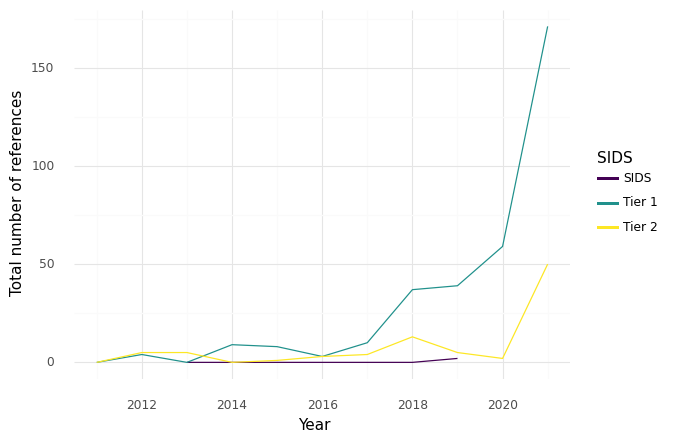

<ggplot: (-9223363259337279800)>

In [45]:
#2v_sids_number_references.csv
reference_sids_health["sum"] = reference_sids_health["intersection"] + reference_sids_health["climate"] + reference_sids_health["health"] 
reference_sids.to_csv(path+ "2v_sids_number_references.csv")
h1 = ggplot(reference_sids_health[reference_sids_health.SIDS != 0], aes(x = "Year", y = "intersection", color = "SIDS")) + \
geom_path(aes()) + \
scale_y_continuous(limits = (0, None), ) + \
theme_minimal() + \
theme(legend_position = "right") + \
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Total number of references")
h1.save(path +'2v_sids_number_references.png')
h1.save(path +'2v_sids_number_references.pdf')
h1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1i_sids_prop_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1i_sids_prop_references.pdf


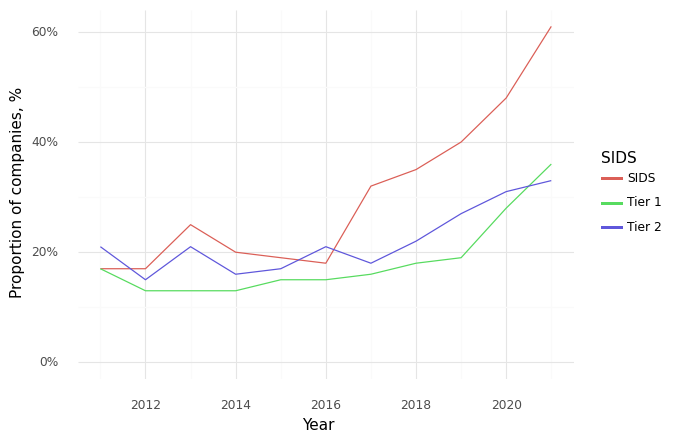

<ggplot: (-9223363259337280936)>

In [46]:
sids_prop[sids_prop.SIDS !=0].to_csv(path+ "1i_sids_prop_references.csv")
i1 = ggplot(sids_prop[sids_prop.SIDS !=0], aes(x = "Year", y = "Intersection", color = "SIDS")) + \
geom_path(aes()) + \
scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
theme_minimal() + \
theme(legend_position = "right") + \
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Proportion of companies, %") 
i1.save(path +'1i_sids_prop_references.png')
i1.save(path +'1i_sids_prop_references.pdf')
i1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2w_sids_prop_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2w_sids_prop_references.pdf


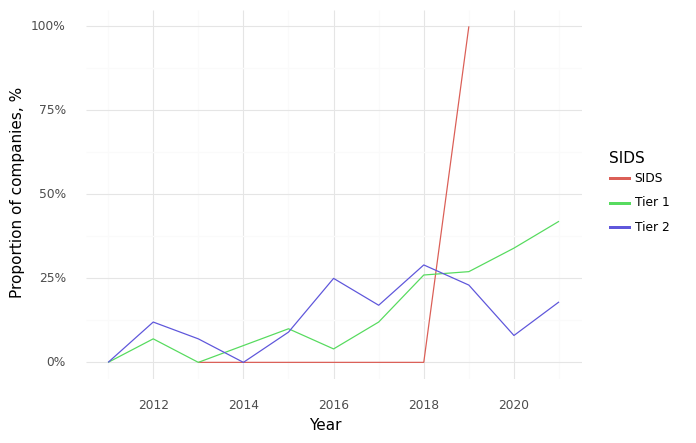

<ggplot: (8777530364662)>

In [47]:
sids_prop_health[sids_prop_health.SIDS !=0].to_csv(path+ "2w_sids_prop_references.csv")
i1 = ggplot(sids_prop_health[sids_prop_health.SIDS !=0], aes(x = "Year", y = "Intersection", color = "SIDS")) + \
geom_path(aes()) + \
scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
theme_minimal() + \
theme(legend_position = "right") + \
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Proportion of companies, %") 
i1.save(path +'2w_sids_prop_references.png')
i1.save(path +'2w_sids_prop_references.pdf')
i1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1j_hdi_number_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1j_hdi_number_references.pdf


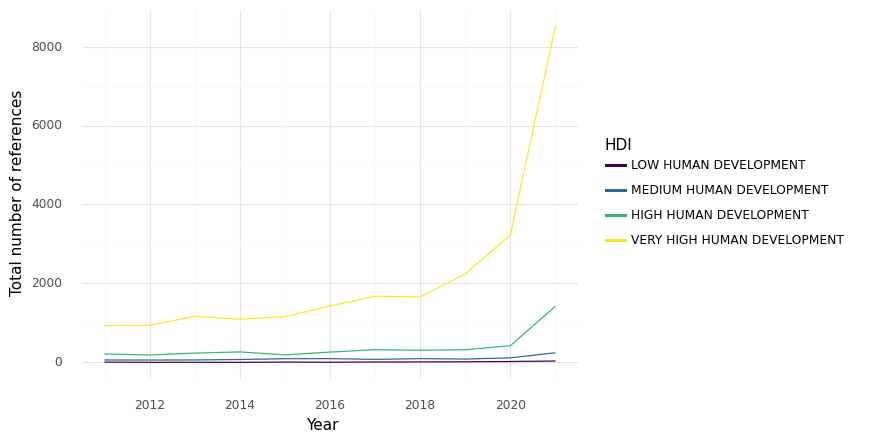

<ggplot: (-9223363259323907128)>

In [48]:
reference_hdi["sum"] = reference_hdi["intersection"] + reference_hdi["climate"] + reference_hdi["health"] 
reference_hdi.to_csv(path+ "1j_hdi_number_references.csv")
j1 = ggplot(reference_hdi[reference_hdi.HDI != 0], aes(x = "Year", y = "intersection", color = "HDI")) + \
geom_path(aes()) + \
scale_y_continuous(limits = (0, None), ) + \
theme_minimal() + \
theme(legend_position = "right") + \
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Total number of references")
j1.save(path +'1j_hdi_number_references.png')
j1.save(path +'1j_hdi_number_references.pdf')
j1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2x_hdi_number_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2x_hdi_number_references.pdf


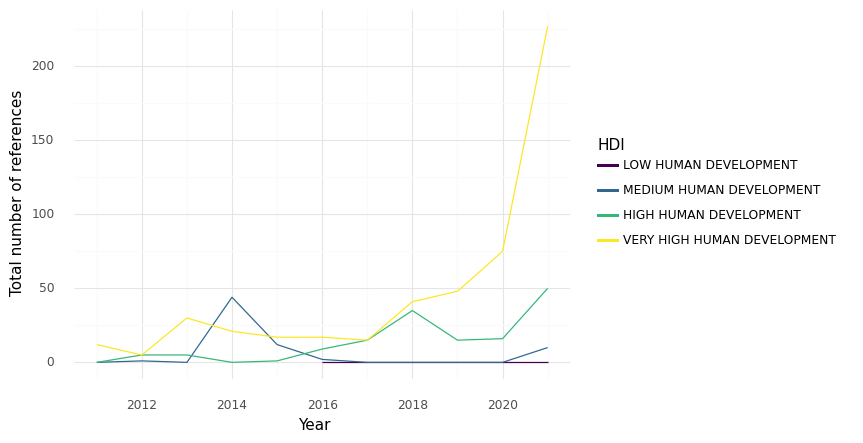

<ggplot: (-9223363259323850794)>

In [49]:
reference_hdi_health["sum"] = reference_hdi_health["intersection"] + reference_hdi_health["climate"] + reference_hdi_health["health"] 
reference_hdi_health["Sector"] = "Health Care Equipment & Ser..."
reference_hdi_health.to_csv(path+ "2x_hdi_number_references.csv")
j1 = ggplot(reference_hdi_health[reference_hdi_health.HDI != 0], aes(x = "Year", y = "intersection", color = "HDI")) + \
geom_path(aes()) + \
scale_y_continuous(limits = (0, None), ) + \
theme_minimal() + \
theme(legend_position = "right") + \
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Total number of references")
j1.save(path +'2x_hdi_number_references.png')
j1.save(path +'2x_hdi_number_references.pdf')
j1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1k_hdi_prop_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1k_hdi_prop_references.pdf


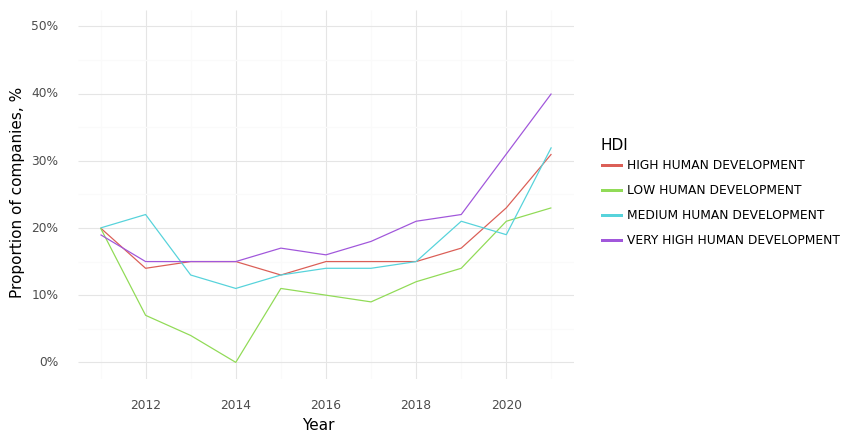

<ggplot: (-9223363259324663962)>

In [50]:
hdi_prop[hdi_prop.HDI !=0].to_csv(path+ "1k_hdi_prop_references.csv")
k1 = ggplot(hdi_prop[hdi_prop.HDI !=0], aes(x = "Year", y = "Intersection", color = "HDI")) + \
geom_path(aes()) + \
scale_y_continuous(labels = percent_format(), limits = (0, 0.5)) + \
theme_minimal() + \
theme(legend_position = "right") + \
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Proportion of companies, %") 
# 1k_hdi_prop_references

k1.save(path +'1k_hdi_prop_references.png')
k1.save(path +'1k_hdi_prop_references.pdf')
k1

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2y_hdi_prop_references.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/2y_hdi_prop_references.pdf


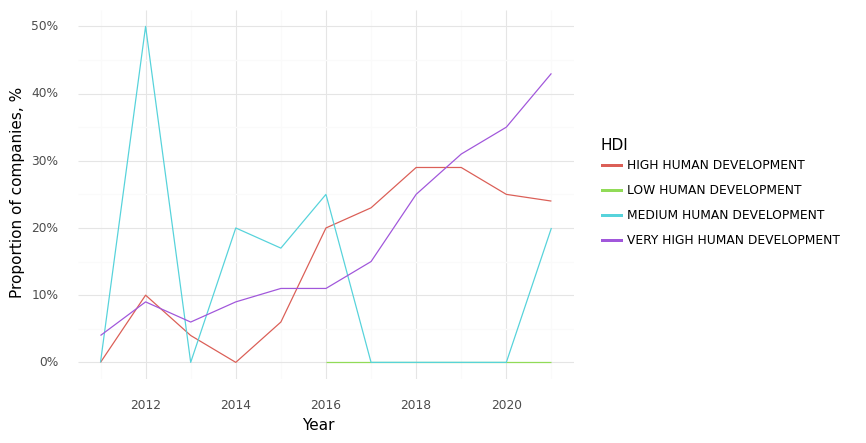

<ggplot: (-9223363259337394898)>

In [51]:
hdi_prop_health[hdi_prop_health.HDI !=0].to_csv(path+ "2y_hdi_prop_references.csv")
k1 = ggplot(hdi_prop_health[hdi_prop_health.HDI !=0], aes(x = "Year", y = "Intersection", color = "HDI")) + \
geom_path(aes()) + \
scale_y_continuous(labels = percent_format(), limits = (0, None)) + \
theme_minimal() + \
theme(legend_position = "right") + \
scale_x_continuous(breaks=(2012,2014,2016,2018, 2020), ) +\
labs(y = "Proportion of companies, %") 
# 1k_hdi_prop_references

k1.save(path +'2y_hdi_prop_references.png')
k1.save(path +'2y_hdi_prop_references.pdf')
k1

In [52]:
# 1l_sector_references_2021
reference_df_sector.to_csv(path+"1l_sector_references_2021.csv")
reference_df_sector

,Sector,intersection,climate,health
0,Aerospace & Defense,302.0,2229.0,5663.0
1,Alternative Energy,406.0,5106.0,5767.0
2,Automobiles & Parts,615.0,10133.0,17018.0
3,Banks,599.0,11899.0,19309.0
4,Basic Resources,0.0,3.0,12.0
5,Beverages,588.0,7181.0,16830.0
6,Chemicals,1949.0,13618.0,39019.0
7,Construction & Materials,1534.0,20551.0,52187.0
8,Diversified,1077.0,11572.0,26848.0
9,Electricity,998.0,18488.0,29181.0


In [53]:
# 1m_avg_sector_references_2020.csv
avg_sector.to_csv(path + "1m_avg_sector_references_2021.csv")
avg_sector

,Sector,intersection,health,climate
0,Aerospace & Defense,2.26,48.77,15.26
1,Alternative Energy,2.13,27.19,16.25
2,Automobiles & Parts,2.35,40.62,28.85
3,Banks,2.10,50.28,25.02
4,Basic Resources,0.00,1.00,1.00
5,Beverages,2.73,59.04,24.86
6,Chemicals,3.68,53.48,23.13
7,Construction & Materials,1.54,34.71,15.10
8,Diversified,1.18,27.23,9.40
9,Electricity,3.59,73.62,40.31


/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 14 x 7 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1n_prop_companies_sector.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 14 x 7 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1n_prop_companies_sector.pdf


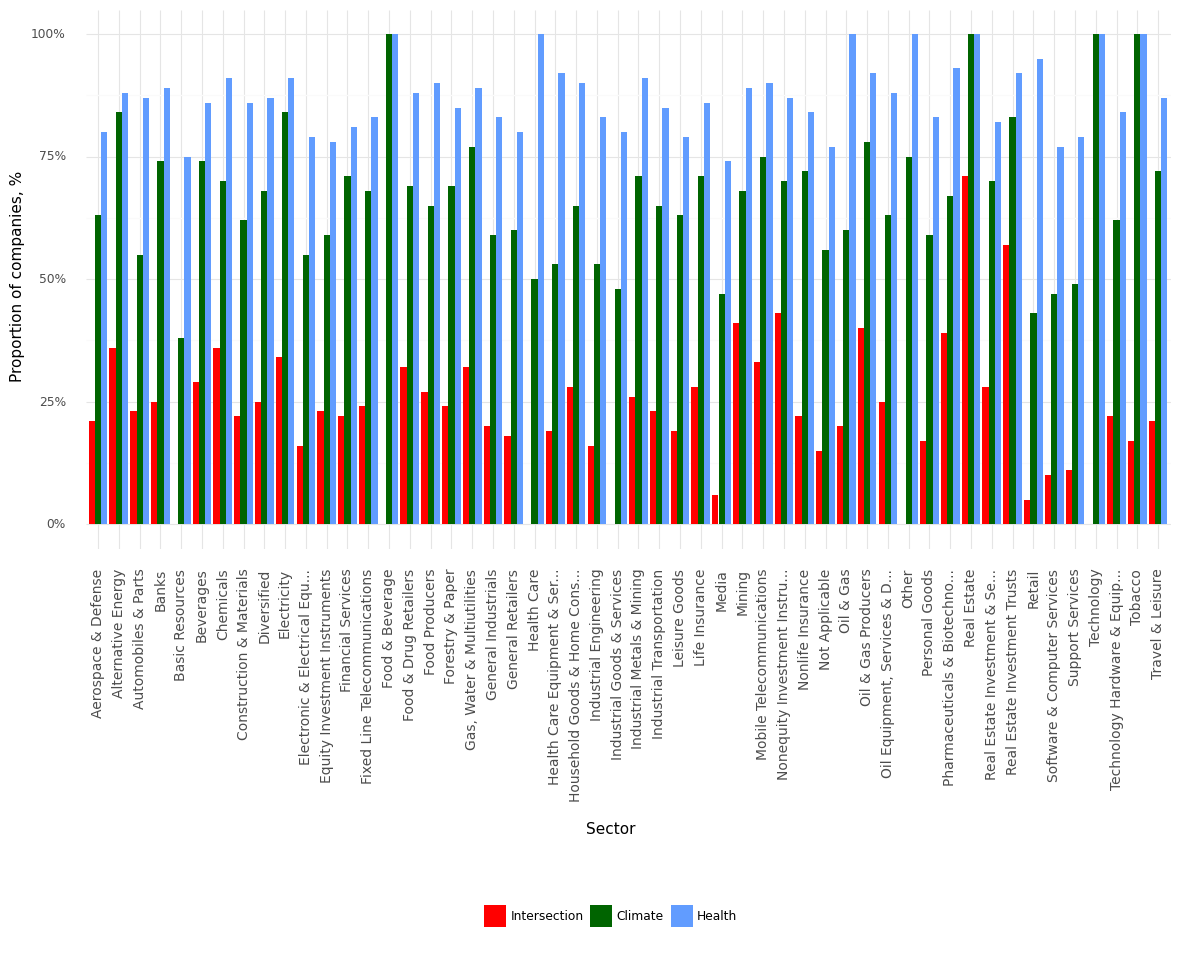

<ggplot: (-9223363259324034055)>

In [54]:
# 1n_prop_companies_sector.csv  2021
sector_prop["Year"] = 2021
sector_prop.to_csv(path + "1n_prop_companies_sector.csv")
melt = sector_prop.melt(id_vars=["Sector", 'Year'])
melt.variable = pd.Categorical(melt.variable, categories=["Intersection", "Climate", "Health"], ordered=True)
n1 = ggplot(melt, aes(x = "Sector", y = "value", fill = "variable")) + \
  geom_bar(stat = "identity", position = "dodge") + \
  theme_minimal() + \
  scale_y_continuous(labels = percent_format()) + \
  theme(axis_text_x = element_text(angle = 90, vjust = 1, hjust=0.5, size = 10 ), ) + \
  theme(legend_position = (0.5, -0.4), legend_direction="horizontal", figure_size=(14, 7)) + \
  scale_fill_manual(values=("red", "darkgreen", "#619cff" )) +\
  labs(fill = "",
       y = "Proportion of companies, %",
       x = "\nSector")
n1.save(path +'1n_prop_companies_sector.png')
n1.save(path +'1n_prop_companies_sector.pdf')
n1

In [55]:
reference["covid_texts"] = reference.groupby(["Year", "Sector", "Id"]).covid.transform("sum") > 0
reference["gender_texts"] = reference.groupby(["Year", "Sector", "Id"]).gender.transform("sum") > 0

In [56]:
covid_inter = reference[(reference.Year > 2019) & (reference.intersection > 0)].groupby(["Year"]).agg({"Id": "nunique", "covid":"sum", "covid_texts": "sum",})
covid_inter["prop"] = (covid_inter["covid"]/covid_inter["Id"]).round(2)
covid_inter.set_axis(["total_docs", "hits", "documents", "prop_doct"], axis=1, inplace=True)
covid_inter["hits"] = covid_inter["hits"].astype("int")
covid_inter.reset_index(inplace = True)
covid_inter.to_csv(path + "1o_intersection_covid.csv")
covid_inter

,Year,total_docs,hits,documents,prop_doct
0,2020,1027,155,69,0.15
1,2021,2096,1380,559,0.66


In [57]:
# 1o_intersection_gender
gender_inter = reference[(reference.Year > 2010) & (reference.intersection > 0)].groupby(["Year"]).agg({"Id": "nunique", "gender":"sum", "gender_texts": "sum", })
gender_inter["prop"] = (gender_inter["gender"]/gender_inter["Id"]).round(2)
gender_inter.set_axis(["total_docs", "hits", "documents", "prop_doct"], axis=1, inplace=True)
gender_inter["hits"] = gender_inter["hits"].astype("int")
gender_inter.reset_index(inplace = True)

/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1o_prop_intersecion_gender.png
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: results/Multiglobal_result/1o_prop_intersecion_gender.pdf


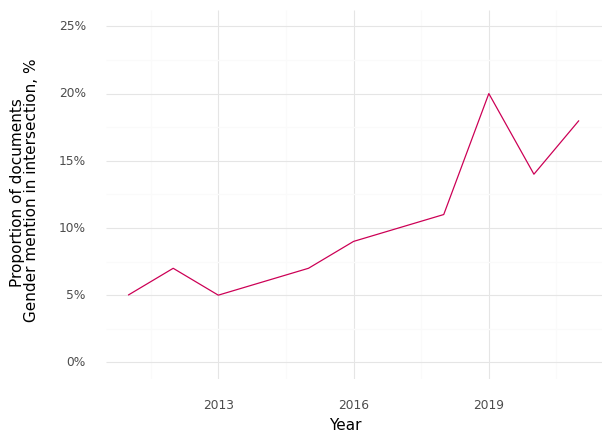

<ggplot: (-9223363259324306137)>

In [58]:
gender_inter.to_csv(path + "1o_intersection_gender.csv", index = False)
o1 = ggplot(gender_inter, aes(x = "Year", y = "prop_doct", group = 1)) +\
  geom_line(color = "#cc0055") +\
  theme_minimal() +\
  labs(x= "Year",
       y = "Proportion of documents\n Gender mention in intersection, %\n") +\
  scale_y_continuous(labels = percent_format(), limits = (0, 0.25))
o1.save(path +'1o_prop_intersecion_gender.png')
o1.save(path +'1o_prop_intersecion_gender.pdf')
o1